## Codigo actual

In [ ]:
import streamlit as st
import streamlit.components.v1 as components
from streamlit_folium import folium_static
import base64
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import pandas as pd
import numpy as np
from folium.raster_layers import WmsTileLayer
from folium.raster_layers import TileLayer
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from branca.element import Figure
import seaborn as sns

def app():
    st.write("""---""")
    st.title('Datos')

    #---------------------------------#
    #st.set_page_config(layout="wide")
    #---------------------------------#
    
    ## Dividir la página en 3 columnas
    col1 = st.sidebar
    col2, col3 = st.beta_columns((1,1))

    #---------------------------------#
    # Sidebar 
    col1.header('Parámetros de entrada')

    ## Sidebar - Filtro del Año
    year = col1.selectbox('Año', list(reversed(range(2001,2016))))

    # Carga de datos
    #@st.cache
    df=pd.read_csv('datos_rios_embalses_tiempo.csv', index_col=[0])
    

    ## Sidebar - Provincia
    provincias = sorted( df['provincia'].unique() )
    selected_provincias = col1.multiselect('Provincias', provincias, provincias)
    
    ##Filtra el data frame
    
    df_filtered = df[(df['ano']==year) & (df['provincia'].isin(selected_provincias))]
    df_filtered_show = df_filtered[['id', 'superficie', 'fecha_x', 'lat', 'lng', 'idprovincia',
       'idmunicipio', 'municipio_x', 'time_ctrl', 'time_ext', 'personal',
       'medios', 'gastos', 'perdidas', 'codigo', 'superficie_total_concello',
       'superficie_forestal_total', 'nombre', 'río', 'capacidad_emb',
       'sup_emb', 'lat_embalse', 'lng_embalse', 'dist_emb_x',
       'num_rios', 'provincia', 'estación',
       'latitud', 'longitud', 'temp_media', 'temp_max_med', 'temp_min_med',
       'prec_acu', 'hum_med', 'hum_max', 'hum_min', 'v_viento_med', 'presion',
       'lluvia', 'helada', 'dist_est_x']]
    #-------------
    col2.subheader('Datos de incendios')
    col2.write('Dimensiones: ' + str(df_filtered_show.shape[0]) + ' filas y ' + str(df_filtered_show.shape[1]) + ' columnas.')

    col2.write(df_filtered_show)

    # Descargar CSV data
    
    def filedownload(df):
        csv = df.to_csv(index=False)
        b64 = base64.b64encode(csv.encode()).decode() 
        href = f'<a href="data:file/csv;base64,{b64}" download="incendios_galicia.csv">Download CSV File</a>'
        return href

    col2.markdown(filedownload(df_filtered_show), unsafe_allow_html=True)

    #---------------------------------#
    # Resumen estadistico de las variables 
    col3.subheader('Descripción estadística')
    col3.write('A continuación se muestra los principales parámtros descriptivos de las variables cuantativas:')
    col3.write(df_filtered_show.describe())
    
    #---------------------------------#
    # Mapa de incendios
    col2.subheader('Evolución de incendios')
    
    meses= df_filtered['num_mes'].unique()
    meses.sort()
    
    lat_lng_list= []
    for i in meses:
        temp=[]
        for index, instance in df_filtered[df_filtered['num_mes']==i].iterrows():
            temp.append([instance['lat'], instance['lng']])
        lat_lng_list.append(temp)

    EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
    EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

    figure1=Figure(width=550, height=700)
    MapObject = folium.Map(location=[42.433581, -7.838777], tiles=EsriImagery, attr=EsriAttribution, zoom_start=8)

    Mapa=figure1.add_child(MapObject)
    HeatMapWithTime(lat_lng_list, radius=12,  gradient={.2: '#fffacd', .5: '#ffd700', 1: '#ff0000' },auto_play=True, position='bottomright').add_to(MapObject)
    #col3.MapObject
    MapObject.save('mapa_dinamico_incendios_galicia.html')
    
   
    #figure2=folium.Figure(width=550,height=550)
    #MapObject = folium.Map(location=[42.733581, -7.838777], tiles=EsriImagery, attr=EsriAttribution, zoom_start=8)
    #HeatMap(list(zip(df_filtered[df_filtered['num_mes']=='12']['lat'],df_filtered[df_filtered['num_mes']=='12']['lng'])), radius=12,  gradient={.2: '#fffacd', .5: '#ffd700', 1: '#ff0000' }).add_to(MapObject)
    
    #m = figure2.add_child(MapObject)
    #m.save('mapa_incendios_galicia.html')
    #col3.write(""" Mapa de los incidenosde mes de Diciembre """)
    #col3.write(components.html(figure2._repr_html_(),height=560))
    Htmlfile=open('mapa_dinamico_incendios_galicia.html','r',encoding='utf-8')
    source_code=Htmlfile.read()
    components.html(source_code, height=560)
    
    st.pyplot(sns.relplot(data=df_filtered, x='fecha_x',y='superficie',kind='line', hue='idprovincia'))

In [30]:
import streamlit as st
import base64
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bs4 import BeautifulSoup
import folium
import pandas as pd
import numpy as np
from folium.raster_layers import WmsTileLayer
from folium.raster_layers import TileLayer
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from branca.element import Figure
import altair as alt
import seaborn as sns
df=pd.read_csv('datos_rios_embalses_tiempo.csv', index_col=[0])

In [7]:
df_filtered = df[(df['ano']==2015)]
df_filtered_show = df_filtered[['id', 'superficie', 'fecha_x', 'lat', 'lng', 'idprovincia',
    'idmunicipio', 'municipio_x', 'time_ctrl', 'time_ext', 'personal',
    'medios', 'gastos', 'perdidas', 'codigo', 'superficie_total_concello',
    'superficie_forestal_total', 'nombre', 'río', 'capacidad_emb',
    'sup_emb', 'lat_embalse', 'lng_embalse', 'dist_emb_x',
    'num_rios', 'provincia', 'estación',
    'latitud', 'longitud', 'temp_media', 'temp_max_med', 'temp_min_med',
    'prec_acu', 'hum_med', 'hum_max', 'hum_min', 'v_viento_med', 'presion',
    'lluvia', 'helada', 'dist_est_x']]

2021-05-03 21:35:39.422 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


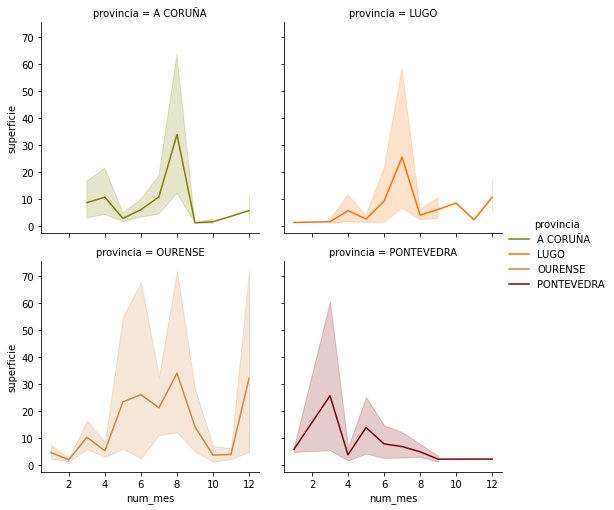

In [77]:

sns.relplot(data=df_filtered, x='num_mes',y='superficie',kind='line', hue='provincia',col='provincia',col_wrap=2, palette=["#808000","#FF6F00","#CD853F","#800000"], height=3.5)


In [78]:
range_=["#808000","#FF6F00","#CD853F","#800000"]
inc_line=alt.Chart(df_filtered).mark_line().encode(
    x="num_mes",
    y="count(id)",
    color=alt.Color('provincia',scale=alt.Scale(range=range_)))
inc_line.save('num_incendios.html')

A continuación se muestran los principales parámetros descriptivos enfocados en la superficie quemada (ha) por las provincias seleccionas:


In [62]:
range_=["#808000","#FF6F00","#CD853F","#800000"]
inc_bar=alt.Chart(df_filtered).mark_bar().encode(
    x="provincia",
    y="count(id)",
    color=alt.Color('provincia',scale=alt.Scale(range=range_)))
inc_bar

alt.Chart(...)

In [65]:
inc_bar|inc_line|sup

ValueError: Only chart objects can be used in HConcatChart.

In [34]:
meses= df_filtered['num_mes'].unique()
meses.sort()
    
lat_lng_list= []
for i in meses:
    temp=[]
    for index, instance in df_filtered[df_filtered['num_mes']==i].iterrows():
        temp.append([instance['lat'], instance['lng']])
    lat_lng_list.append(temp)

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

figure1=Figure(width=550, height=700)
MapObject = folium.Map(location=[42.433581, -7.838777], tiles=EsriImagery, attr=EsriAttribution, zoom_start=8)

Mapa=figure1.add_child(MapObject)
HeatMapWithTime(lat_lng_list, radius=12,  gradient={.2: '#fffacd', .5: '#ffd700', 1: '#ff0000' },auto_play=True, position='bottomright').add_to(MapObject)
MapObject
MapObject.save('mapa_dinamico_incendios_galicia.html')
#col3.MapObject
 
#figure2=folium.Figure(width=550,height=550)
#MapObject = folium.Map(location=[42.733581, -7.838777], tiles=EsriImagery, attr=EsriAttribution, zoom_start=8)
#HeatMap(list(zip(df_filtered[df_filtered['num_mes']=='12']['lat'],df_filtered[df_filtered['num_mes']=='12']['lng'])), radius=12,  gradient={.2: '#fffacd', .5: '#ffd700', 1: '#ff0000' }).add_to(MapObject)

#m = figure2.add_child(MapObject)
#m.save('mapa_incendios_galicia.html')
#col3.html(m._repr_html_(),height=560)

In [36]:
MapObject

In [17]:
meses= df_filtered['num_mes'].unique()
meses.sort()

In [18]:
lat_lng_list= []
for i in meses:
    temp=[]
    for index, instance in df_filtered[df_filtered['num_mes']==i].iterrows():
        temp.append([instance['lat'], instance['lng']])
    lat_lng_list.append(temp)

In [6]:
m

In [4]:
df

,id,superficie,fecha_x,lat,lng,idprovincia,idmunicipio,municipio_x,time_ctrl,time_ext,...,hum_med,hum_max,hum_min,v_viento_med,presion,lluvia,helada,dist_est_x,dist_est_y,ano
0,2001150021,5.00,2001-02-20 00:00:00-05:00,43.703581,-8.038777,15,22,CEDEIRA,235,270,...,78.0,92.0,58.0,3.0,1015.0,13.0,0.0,29.186920,29.186920,2001
11,2001150088,1.50,2001-02-24 00:00:00-05:00,42.936918,-9.114350,15,34,DUMBRÍA,470,530,...,79.0,91.0,63.0,NaN,942.0,9.0,0.0,34.817885,34.817885,2001
15,2001150090,3.00,2001-02-25 00:00:00-05:00,42.643031,-8.939252,15,67,"POBRA DO CARAMIÑAL, A",185,220,...,76.0,92.0,59.0,5.0,1017.0,10.0,0.0,12.204302,12.204302,2001
26,2001150094,1.50,2001-02-25 00:00:00-05:00,43.186836,-8.685470,15,19,CARBALLO,125,135,...,92.0,99.0,74.0,NaN,NaN,17.0,8.0,3.411028,3.411028,2001
32,2001150111,3.80,2001-02-25 00:00:00-05:00,42.917476,-9.082862,15,45,MAZARICOS,1050,1051,...,79.0,91.0,63.0,NaN,942.0,9.0,0.0,31.468092,31.468092,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357662,2015360747,1.45,2015-09-06 00:00:00-04:00,42.103959,-8.522512,36,50,SALVATERRA DE MIÑO,92,486,...,76.0,96.0,48.0,3.0,NaN,10.0,0.0,5.065956,5.065956,2015
357705,2015360751,1.00,2015-09-06 00:00:00-04:00,42.157695,-8.397080,36,34,"NEVES, AS",404,420,...,68.0,88.0,40.0,2.0,999.0,10.0,0.0,5.750805,5.750805,2015
357755,2015360770,5.94,2015-09-08 00:00:00-04:00,42.554722,-8.018586,36,16,DOZÓN,87,194,...,76.0,90.0,55.0,19.0,905.0,9.0,0.0,7.535815,7.535815,2015
357790,2015360794,3.20,2015-09-28 00:00:00-04:00,42.243441,-8.322375,36,13,COVELO,89,428,...,73.0,89.0,52.0,4.0,975.0,6.0,0.0,9.613333,9.613333,2015


In [ ]:
import seaborn as sns
sns.relplot(data=df,x='fecha',y='superficie',kind='line', hue='idprovincia')